In [1]:
import os, sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import MaaSSim

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#!pip install MaaSSim
import MaaSSim.utils
import logging
from dotmap import DotMap
import MaaSSim.simulators
from MaaSSim.data_structures import structures as inData
from MaaSSim.day_to_day import driver_opt_out
from MaaSSim.day_to_day import traveller_opt_out
from MaaSSim.day_to_day import d2d_kpi_veh
from MaaSSim.day_to_day import d2d_kpi_pax

In [4]:
import osmnx as ox
import networkx as nx
import random
import math
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [5]:
params = MaaSSim.utils.get_config('glance.json')
params.city = "Amsterdam, Netherlands"
params.paths.G = "../../data/graphs/Amsterdam.graphml"
params.paths.skim = "../../data/graphs/Amsterdam.csv"
params.vehicle_fixed_positions = True
params.times.patience = 600 #second
params.dist_threshold = 10000 #meter
params.dist_threshold_min = 1000 #meter

params.d2d.probabilistic = True
params.d2d.heterogeneous = False
params.d2d.ini_exp_income = 42 #euro
params.d2d.ini_exp_wt = 10 #minutes
params.d2d.res_wage_sp = 1
params.d2d.exp_income_sp = 1
params.d2d.exp_utility_eps = 0
params.d2d.veh_omega = 0.10 # degree of learning: 0<omega<1
params.d2d.pax_omega = 0.10 # degree of learning: 0<omega<1
params.d2d.kappa = 1
params.d2d.B_income = 0.1
params.d2d.fuel_cost = 0.25 #euro/km

params.d2d.B_fare = 1/14.67
params.d2d.B_inveh_time = 1
params.d2d.B_exp_time = 1.5
params.PT_fare = 1 ## euro
params.PT_speed  = 4 # m/s

params.nPM = 1 # number of platforms. platform id starts from 1
params.platforms.base_fare = 1.4 #euro
params.platforms.fare = 1.21 #euro/km
params.platforms.min_fare = 2 # euro
params.platforms.comm_rate = 0.2

params.nP = 2000
params.nV = 100
params.nD = 200
params.simTime = 4
params.d2d.res_wage = params.simTime*13.20 #euro

In [6]:
G = ox.load_graphml(params.paths.G)

In [7]:
G.nodes[271391421]

{'y': 52.3714896, 'x': 4.8907506, 'street_count': 3}

In [8]:
len(G.nodes)

12289

In [135]:
#sim = MaaSSim.simulators.simulate(params=params, logger_level=logging.WARNING)
#sim = MaaSSim.simulators.simulate(params=params, kpi_veh=d2d_kpi_veh, logger_level=logging.WARNING)
sim_with20 = MaaSSim.simulators.simulate(params=params, f_driver_out=driver_opt_out,f_trav_out=traveller_opt_out,
                                  kpi_veh=d2d_kpi_veh, kpi_pax=d2d_kpi_pax, logger_level=logging.WARNING)

23-05-22 18:36:43-WARNING-Setting up 4h simulation at 2022-05-23 16:36:03 for 100 vehicles and 2000 passengers in Amsterdam, Netherlands
23-05-22 18:36:58-WARNING-simulation time 8.9 s
23-05-22 18:36:58-WARNING-assertion tests for simulation results - passed
23-05-22 18:37:14-WARNING-simulation time 10.6 s
23-05-22 18:37:15-WARNING-assertion tests for simulation results - passed
23-05-22 18:37:30-WARNING-simulation time 10.4 s
23-05-22 18:37:31-WARNING-assertion tests for simulation results - passed
23-05-22 18:37:48-WARNING-simulation time 13.5 s
23-05-22 18:37:49-WARNING-assertion tests for simulation results - passed
23-05-22 18:38:04-WARNING-simulation time 11.3 s
23-05-22 18:38:05-WARNING-assertion tests for simulation results - passed
23-05-22 18:38:20-WARNING-simulation time 11.6 s
23-05-22 18:38:20-WARNING-assertion tests for simulation results - passed
23-05-22 18:38:36-WARNING-simulation time 12.2 s
23-05-22 18:38:37-WARNING-assertion tests for simulation results - passed
23-

<AxesSubplot:>

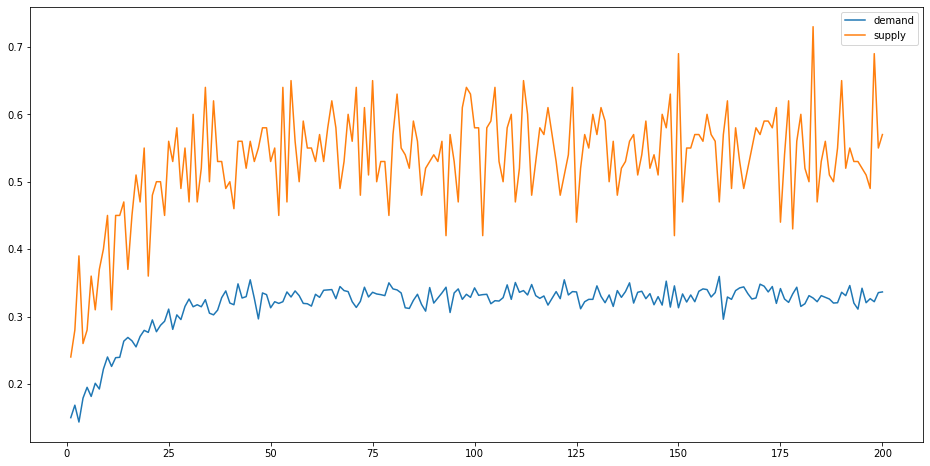

In [131]:
lyp = []
lyd = []

sim = sim_without
for d in range(0,sim.params.nD):
    lyp.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
    lyd.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
lx = [i for i in range(1,len(lyp)+1)]

fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(x=lx, y=lyp, label = 'demand')#, marker='o')
sns.lineplot(x=lx, y=lyd, label = 'supply')#, marker='o')
#ax.set_ylim([0,700])

<AxesSubplot:>

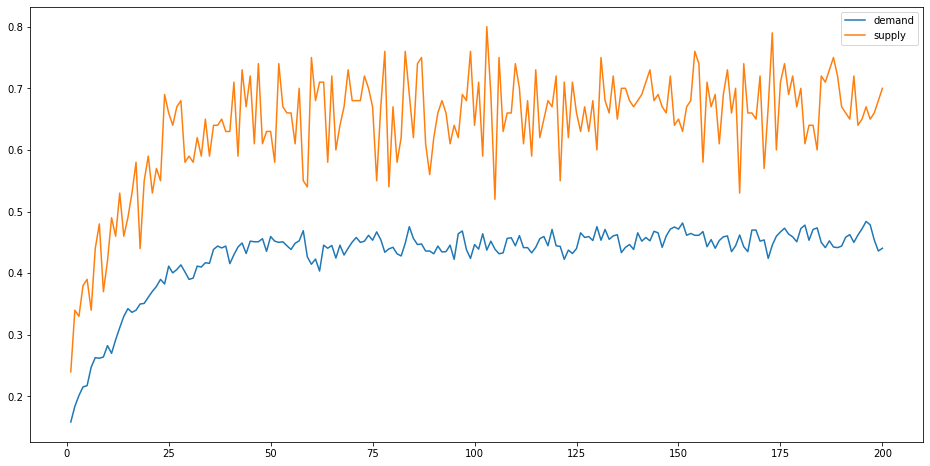

In [130]:
lyp = []
lyd = []

sim = sim_with
for d in range(0,sim.params.nD):
    lyp.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
    lyd.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
lx = [i for i in range(1,len(lyp)+1)]

fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(x=lx, y=lyp, label = 'demand')#, marker='o')
sns.lineplot(x=lx, y=lyd, label = 'supply')#, marker='o')
#ax.set_ylim([0,700])

<AxesSubplot:>

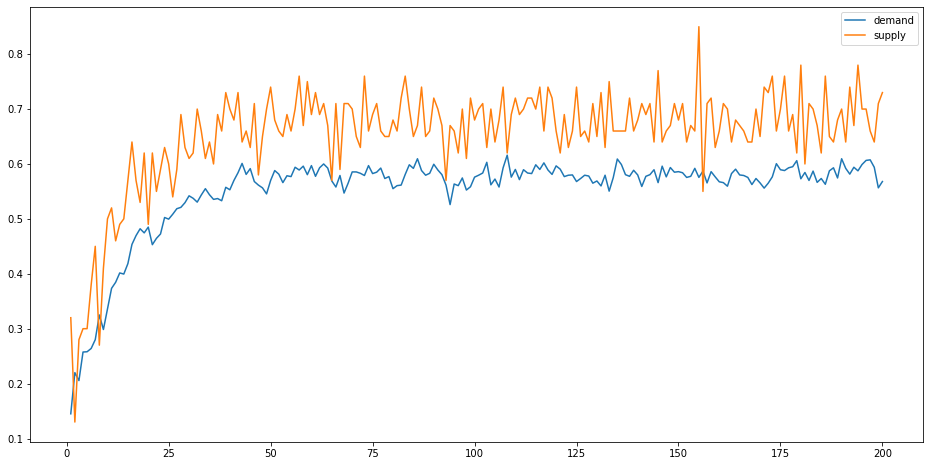

In [136]:
lyp = []
lyd = []

sim = sim_with20
for d in range(0,sim.params.nD):
    lyp.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
    lyd.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
lx = [i for i in range(1,len(lyp)+1)]

fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(x=lx, y=lyp, label = 'demand')#, marker='o')
sns.lineplot(x=lx, y=lyd, label = 'supply')#, marker='o')
#ax.set_ylim([0,700])

<AxesSubplot:>

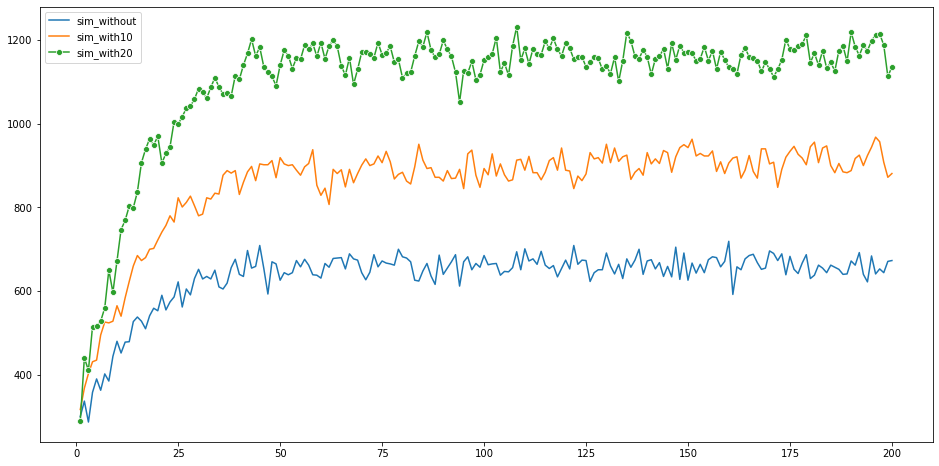

In [139]:
lyp = []

sim = sim_without
lyp1 = []
for d in range(0,sim.params.nD):
    lyp1.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0))

lx = [i for i in range(1,len(lyp1)+1)]
fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(x=lx, y=lyp1, label = 'sim_without')#, marker='o')

sim = sim_with
lyp2 = []
for d in range(0,sim.params.nD):
    lyp2.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0))
    
sns.lineplot(x=lx, y=lyp2, label = 'sim_with10')#, marker='o')

sim = sim_with20
lyp3 = []
for d in range(0,sim.params.nD):
    lyp3.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0))
    
sns.lineplot(x=lx, y=lyp3, label = 'sim_with20', marker='o')

<AxesSubplot:>

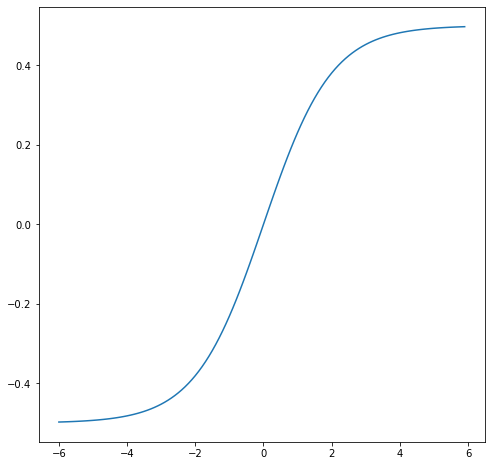

In [107]:
y = []
yy = []
yyy = []
yyyy = []
x = []
for i in np.arange(-6,6,0.1):
    x.append(i)
    y.append(1/(1+math.exp(i)))
    yy.append(math.exp(i)/(1+math.exp(i)))
    yyy.append(1/(1+math.exp(-i)))
    yyyy.append((1/(1+math.exp(-i)))-0.5)

    
    
fig, ax = plt.subplots(figsize=(8,8))
# sns.lineplot(x=x, y=y)
# sns.lineplot(x=x, y=yy)
# sns.lineplot(x=x, y=yyy)
sns.lineplot(x=x, y=yyyy)

In [61]:
wom_i = 0.5
wom_j = 

u = ln((1/wom_i)-1)+wom_i-1
1/(1+math.exp(u))

0.6224593312018546

In [19]:
from numpy import log as ln

u = 0.5
b = 1
a = 1
dif = (40-50)/40

e = 1/(1+math.exp(b*(ln((1/u)-1)+dif)))
e

0.5621765008857981

In [14]:
ln(1)+2

2.0

In [ ]:
u = 0.99
ln((1/u)-1)

-4.595119850134584

1.0

<AxesSubplot:>

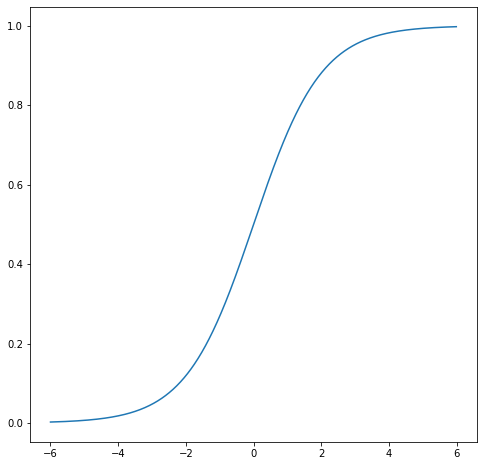

In [313]:
# How the S-shaped learning curve works:

y = []
x = []
u = 0.5
b = 1 # learning degree: agents with greater LD learn and adopt faster. 
      # In a way we can say they are more sensitive

for dif in np.arange(-6,6,0.01):
    x.append(dif)
    e = 1/(1+math.exp(b*(ln((1/u)-1)-dif)))
    y.append(e)


fig, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x=x, y=y)